In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1.1 Just do one big experiment

In [3]:
 # First we'll generate the points we're interested in for many repeated experiments.
dimension = 2
n_experiments = 1
n_points_per_experiment = 10000
points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))

In [4]:
# Next, check whether the points are in the circle
radius = (points**2).sum(axis=0)
inside_the_circle = (radius <= 1)
inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
pi = 4 * pi_by_4

In [5]:
average = pi.mean()
uncertainty = (4*inside_the_circle).std()
print(f'={average} ± {uncertainty}')

=3.122 ± 1.6556316015345927


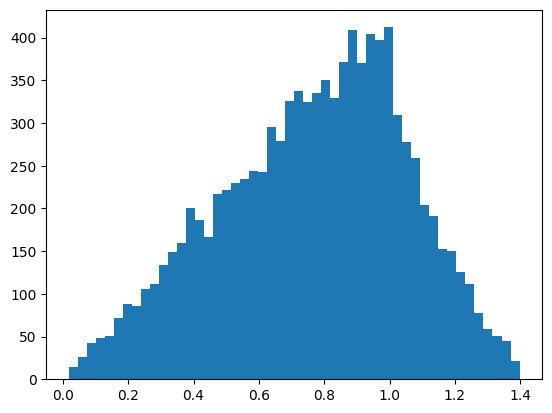

In [6]:
plt.hist(radius**0.5, bins=50)
plt.show()

**Explaination:** 

The Histogram is skewed left. This means there are more binned points on the left of the maximum (approximately 1) than on the right. This results from the fact that we can have more values with radius of 1 because its circumference is the biggest. The bin size of the left side decrease, because on a circumference with a lower radius less points are accumulated. The decrease on the right is due to the cutoff of the circumference with a radius greater than 1. 

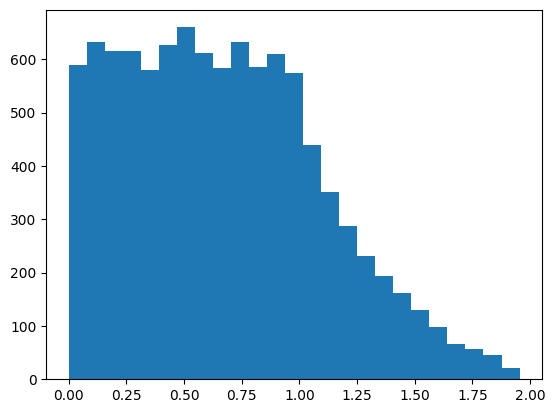

In [7]:
plt.hist(radius, bins=25)
plt.show()

**Explaination:** 
Here the same reasoning applies as above, however here a different scalling factor is applied, since the circumference scales linearly with 2$\pi \cdot r$ and the area quadratically with $\pi \cdot r^2$'

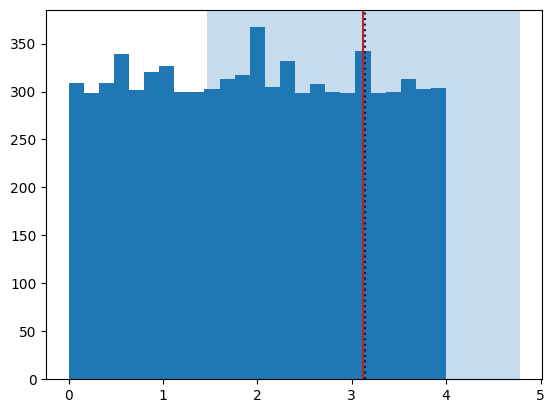

In [8]:
mask = radius <= 1
indicator = 4*radius[mask]

plt.hist(indicator, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average, color='red', zorder=1)
plt.axvspan(average-uncertainty, average+uncertainty, alpha=0.25)
plt.show()

## 1.2 Split into 100 experiments

In [9]:
def sample(n_experiments, n_points_per_experiment):
    points = np.random.uniform(low=-1.0, high=1.0, size=(dimension, n_points_per_experiment, n_experiments, ))
    return points

def find_pi(points):
    radius = (points**2).sum(axis=0)
    inside_the_circle = (radius <= 1)
    inside_the_square = ((-1.0 <= points[0]) & (points[0] <= 1.0) & (-1.0 <= points[1]) & (points[1] <= 1.0))
    pi_by_4 = inside_the_circle.sum(axis=0) / inside_the_square.sum(axis=0)
    pi = 4 * pi_by_4
    return pi

def estimate(pi, n_experiments):
    average = np.sum(pi)/(n_experiments)
    uncertainty = np.sqrt(
        np.sum((pi-average)**2)/
         (n_experiments-1))
    return average, uncertainty

In [10]:
n_experiments_2 = 100
n_points_per_experiment_2 = 100

points_2 = sample(n_experiments_2, n_points_per_experiment_2)
pi_2 = find_pi(points_2)
average_2, uncertainty_2 = estimate(pi_2, n_experiments_2)
print(f'={average_2:.3f} ± {uncertainty_2:.3f}')

=3.143 ± 0.171


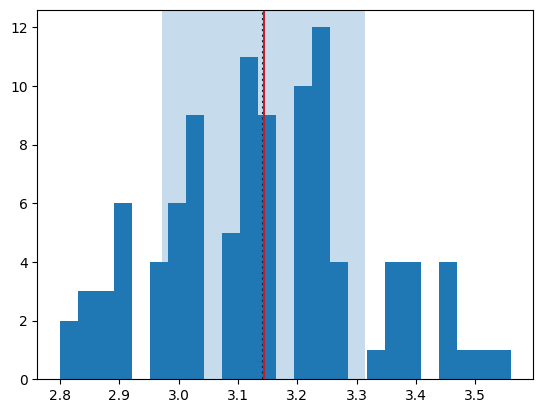

In [11]:
plt.hist(pi_2, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_2, color='red', zorder=1)
plt.axvspan(average_2-uncertainty_2, average_2+uncertainty_2, alpha=0.25)

## 1.3 A Zillion Little Experiments

In [12]:
n_experiments_3 = 10000
n_points_per_experiment_3 = 1

points_3 = sample(n_experiments_3, n_points_per_experiment_3)
pi_3 = find_pi(points_3)
average_3, uncertainty_3 = estimate(pi_3, n_experiments_3)
print(f'={average_3:.3f} ± {uncertainty_3:.3f}')

=3.132 ± 1.649


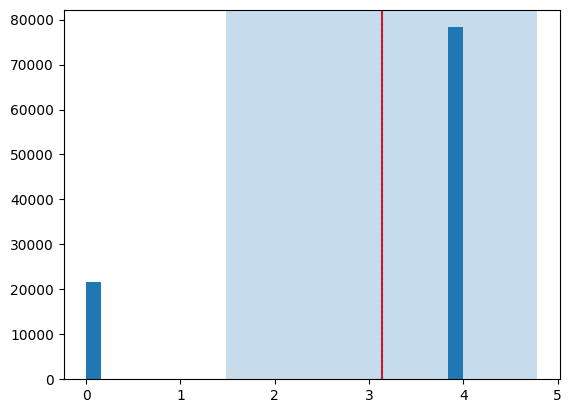

In [13]:
plt.hist(pi_3, bins=25)
plt.axvline(np.pi, color='black', zorder=1, linestyle=':')
plt.axvline(average_3, color='red', zorder=1)
plt.axvspan(average_3-uncertainty_3, average_3+uncertainty_3, alpha=0.25)

**Explaination** 
Its observable that we either get 4 (the square area) as result or 0 in a bin relation of $\pi$/4.


## 1.4 Stop and think

A standard derivation of a single experiment with only a measurement of one variable does not make sense, since no average and its derivation can be defined. If the single experiment contains a certain sample size of one measured variable a standard derivation can be derived, however will stay constant, independent from the size of the sample size, as can be shown in task 1.1. and 1.3. 

Finally, the reorganization of pairs and number of experiments showed clearly that in this way the uncertainty of the expectation value can be lowered.

## 1.5 More Experiments vs. Longer Experiments

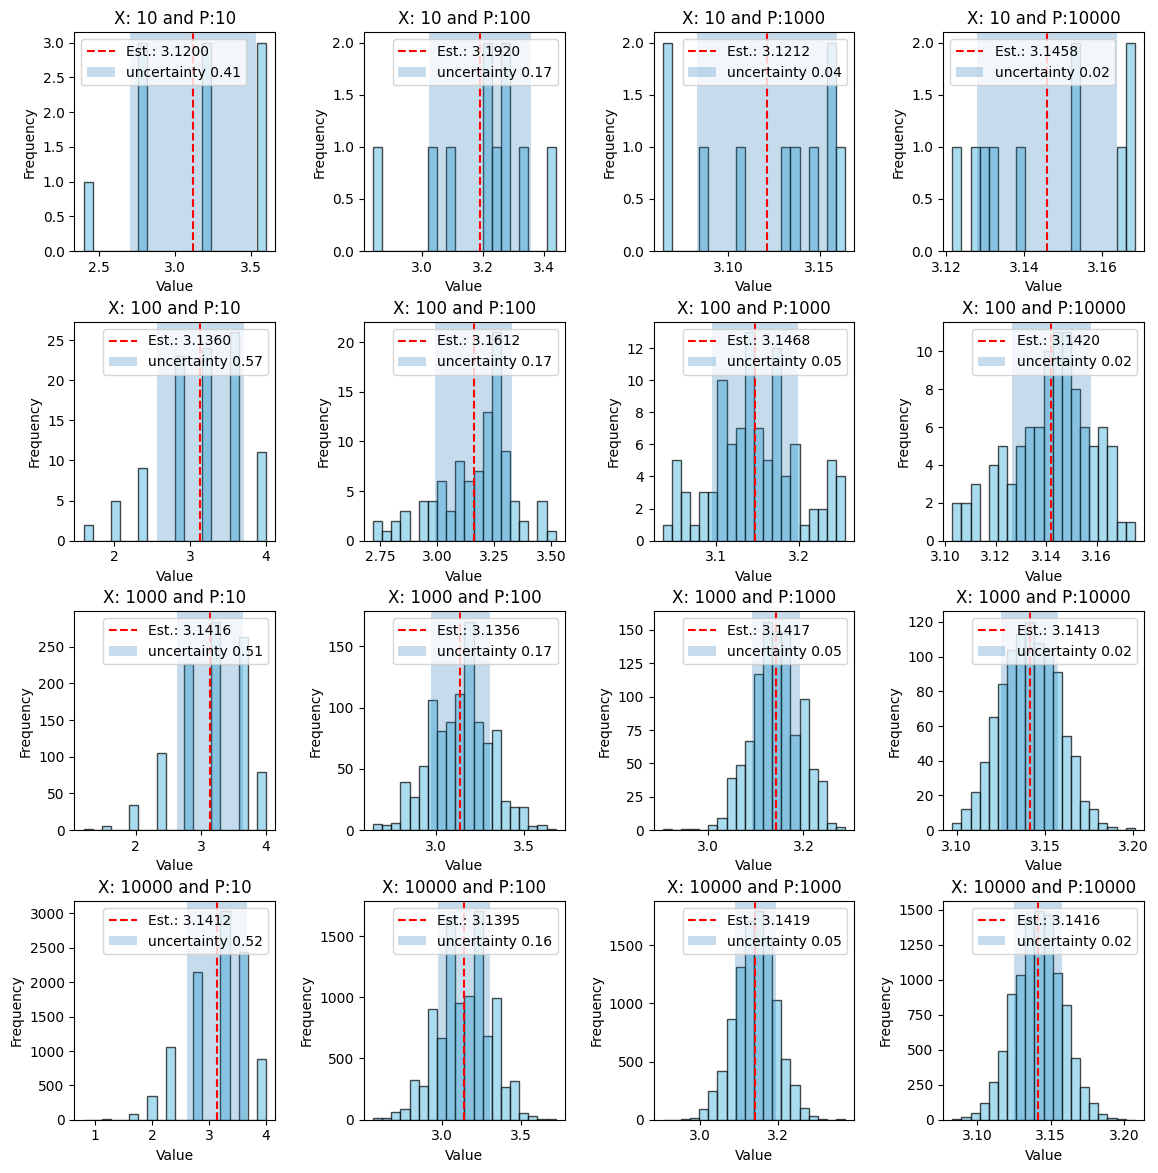

pi_estimates: [3.12       3.192      3.1212     3.14584    3.136      3.1612
 3.14684    3.142008   3.1416     3.13556    3.141744   3.1413184
 3.14124    3.139456   3.14186    3.14160332]
pi_uncertainties: [0.41311822 0.16844386 0.03836897 0.01802043 0.5734038  0.16783397
 0.05181878 0.01569837 0.51136184 0.16796815 0.05065306 0.01622865
 0.51982909 0.16484326 0.05251849 0.01634997]


In [19]:
P = np.array([10, 100, 1000, 10000])
X = np.array([10, 100, 1000, 10000])
pi_estimates = np.zeros(16)
pi_uncertainties = np.zeros(16)    
    
# Creating a 4x4 grid for the histograms
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
fig.tight_layout(pad=3.0)

counter_1 = 0

# Loop for generating estimates and plotting histograms
for i in range(0, 4):
    counter_2 = 0
    for j in range(0, 4):
        # Sampling data and estimating pi and uncertainty
        sampled_data = sample(X[i], P[j])
        pi_value, uncertainty_value = estimate(find_pi(sampled_data), X[i])
        pi_estimates[counter_1 + counter_2] = pi_value
        pi_uncertainties[counter_1 + counter_2] = uncertainty_value

        # Generating histogram for the current sampled data
        ax = axs[i, j]
        ax.hist(find_pi(sampled_data), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        ax.axvline(pi_value, color='r', linestyle='dashed', linewidth=1.5, label=f'Est.: {pi_value:.4f}')
        ax.axvspan(pi_value - uncertainty_value, pi_value+uncertainty_value, alpha=0.25, label=f'uncertainty {uncertainty_value:.2f}')
        ax.set_title(f'X: {X[i]} and P:{P[j]}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.legend()

        # Update counter
        counter_2 += 1
    counter_1 += 4

# Show the plot
plt.show()

print("pi_estimates:", pi_estimates)
print("pi_uncertainties:", pi_uncertainties)


In [15]:
final_pi, final_uncertainty = estimate(pi_estimates, 16)
print(f'={final_pi:.3f} ± {final_uncertainty:.3f}')

=3.130 ± 0.052


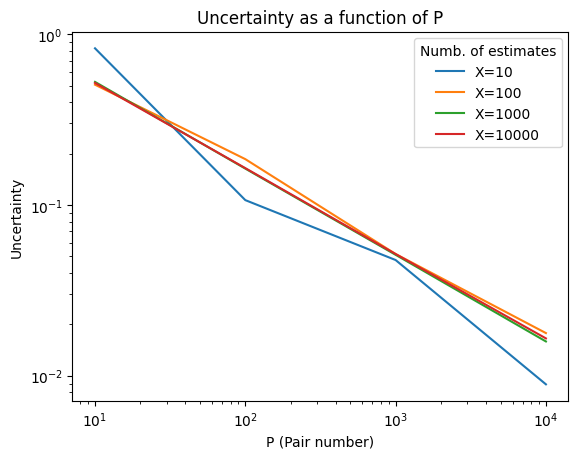

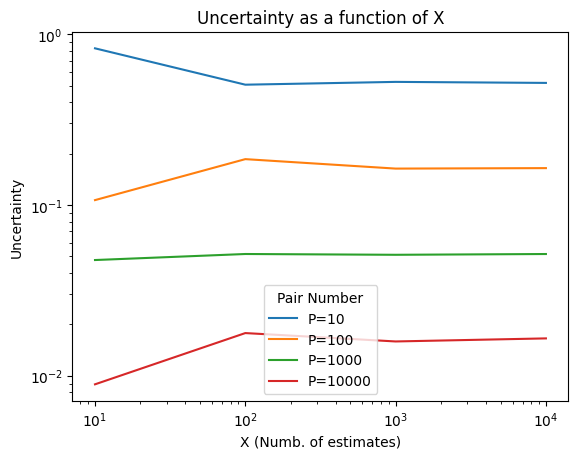

In [16]:
plt.loglog(P,pi_uncertainties[:4],label=f'X={X[0]}')
plt.loglog(P,pi_uncertainties[4:8],label=f'X={X[1]}')
plt.loglog(P,pi_uncertainties[8:12],label=f'X={X[2]}')
plt.loglog(P,pi_uncertainties[-4:],label=f'X={X[3]}')

plt.title('Uncertainty as a function of P')
plt.ylabel('Uncertainty')
plt.xlabel('P (Pair number)')
plt.legend(title="Numb. of estimates")
plt.show()

plt.loglog(P,pi_uncertainties[::4],label=f'P={P[0]}')
plt.loglog(P,pi_uncertainties[1::4],label=f'P={P[1]}')
plt.loglog(P,pi_uncertainties[2::4],label=f'P={P[2]}')
plt.loglog(P,pi_uncertainties[3::4],label=f'P={P[3]}')

plt.title('Uncertainty as a function of X')

plt.ylabel('Uncertainty')
plt.xlabel('X (Numb. of estimates)')
plt.legend(title="Pair Number")

**Observations**
Regarding the "Uncertainty as a function of P" we see the expected falling curve for higher Pair numbers. So for higher pair numbers, the uncertainty gets lower. 
Regarding the "Uncertainty as a function of X" we the that independent from the Pair number and number of estimates the Uncertainty stays constant.  So at a certain amount of estimates the uncertainty stays constant and no further increase of X add further informations. 